In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import time

from citipy import citipy
from datetime import datetime
from config import weather_api_key
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combos
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
# Create list for cities
cities = []

# Identify nearest city for lat and lng combos
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If city is unique, add to cities list
    if city not in cities:
        cities.append(city)
        
# Print city count to confirm sufficient count
len(cities)

629

In [ ]:
# Create list to hold the weather data
city_data = []
# Begin logging data
print('Beginning Data Retrieval     ')
print('-----------------------------')

# Create counters
record_count = 1
set_count = 1

# Setup URL
url = 'https://api.openweathermap.org/data/2.5/weather?APPID=' + weather_api_key + '&units=imperial'

# Loop through all cities
for i, city in enumerate(cities):
    
    # Group cities in sets of 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = url + '&q=' + city.replace(' ', '+')
    
    # Log URL, record, set numbers and city
    print(f'Processing Record {record_count} or Set {set_count} | {city}')
    
    # Add 1 to record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse JSON and retrieve data
        city_weather = requests.get(city_url).json()
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Convert date
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append to city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    #If error, skip city
    except:
        print('City not found. Skipping...')
#         pass
    
# Indicate that Data loading is complete
print('-----------------------------')
print('Data Retrieval Complete      ')
print('-----------------------------')

In [ ]:
# Convert the array of dictionaries to DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

In [ ]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [ ]:
city_data_df.head(10)

In [ ]:
# Create output file (CSV)
output_data_file = 'weather_data/cities.csv'
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [5]:
# Reload CSV
city_data_df = pd.read_csv('weather_data/cities.csv')

city_data_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Chokurdakh,RU,2022-10-05 19:22:55,70.6333,147.9167,16.29,97,97,4.83
1,1,Hithadhoo,MV,2022-10-05 19:22:56,-0.6000,73.0833,82.40,73,100,17.56
2,2,Hilo,US,2022-10-05 19:22:57,19.7297,-155.0900,85.28,74,40,3.44
3,3,La Ronge,CA,2022-10-05 19:22:57,55.1001,-105.2842,43.02,45,40,6.91
4,4,Busselton,AU,2022-10-05 19:22:58,-33.6500,115.3333,49.48,60,18,9.91
5,5,Kapaa,US,2022-10-05 19:21:29,22.0752,-159.3190,80.58,87,100,5.75
6,6,Rikitea,PF,2022-10-05 19:22:59,-23.1203,-134.9692,69.57,59,0,21.23
7,7,Port Elizabeth,ZA,2022-10-05 19:23:00,-33.9180,25.5701,61.32,85,40,9.22
8,8,Geraldton,AU,2022-10-05 19:23:00,-28.7667,114.6000,54.01,87,75,6.91
9,9,Hebi,CN,2022-10-05 19:23:02,35.8992,114.1925,49.57,65,92,3.44


In [6]:
# Extract relevant fields from the DF
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

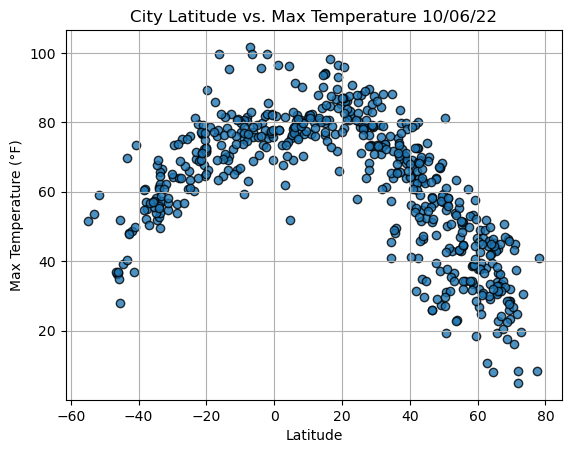

In [7]:
import time

# Build scatter plot for lat vs. max temp
plt.scatter(lats,
            max_temps,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label="Cities")

# Graph properties
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (°F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save figure
plt.savefig('weather_data/Fig1.png')

plt.show()

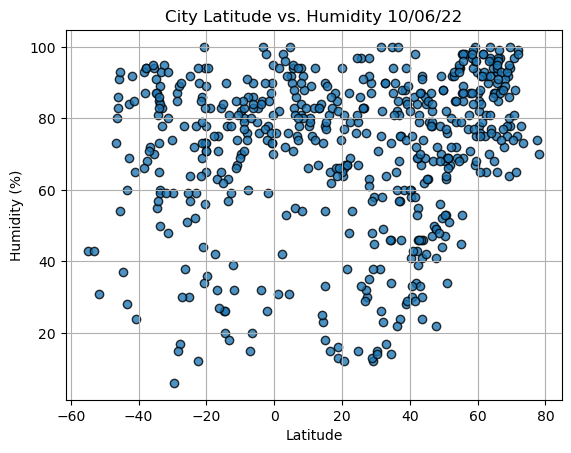

In [8]:
# Build scatter plot for lat vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label="Cities")

# Graph properties
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save figure
plt.savefig('weather_data/Fig2.png')

plt.show()

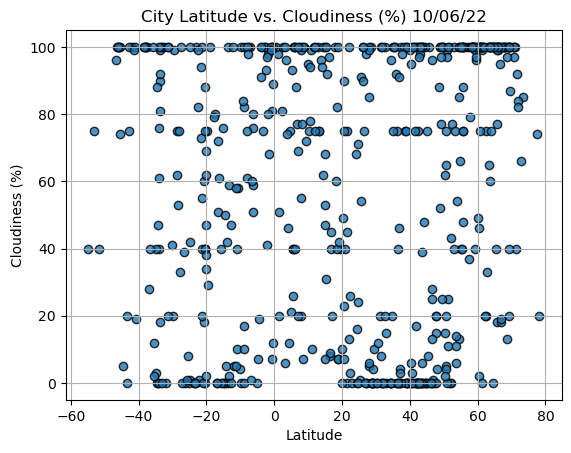

In [9]:
# Build scatter plot for lat vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label="Cities")

# Graph properties
plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save figure
plt.savefig('weather_data/Fig3.png')

plt.show()

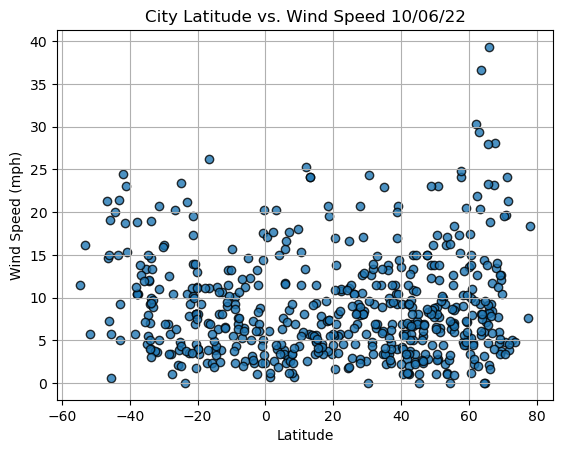

In [10]:
# Build scatter plot for lat vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label="Cities")

# Graph properties
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save figure
plt.savefig('weather_data/Fig4.png')

plt.show()

In [22]:
# Create fxn to perform linreg on weather data and plot regression line

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calc the regression y-values
    regress_values = x_values * slope + intercept
    
    # Get equation of the line
    line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
    
    # Create a scatter plot and plot regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')
    
    # Annotate plot
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='r')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    plt.show()

In [12]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                     Portland
Country                        US
Date          2022-10-05 19:21:37
Lat                       45.5234
Lng                     -122.6762
Max Temp                     70.0
Humidity                       79
Cloudiness                    100
Wind Speed                   6.91
Name: 13, dtype: object

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

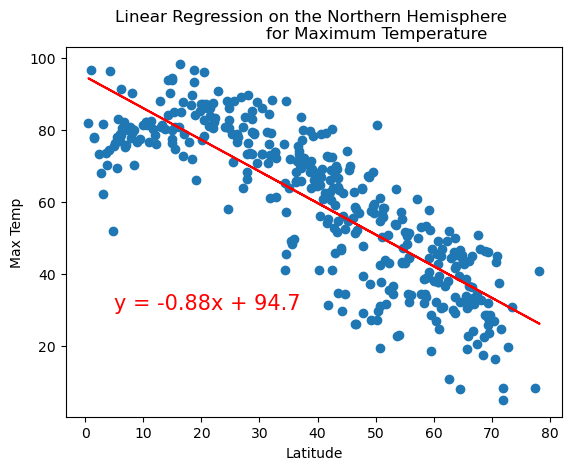

In [28]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for Maximum Temperature',
                       'Max Temp', (5, 30))

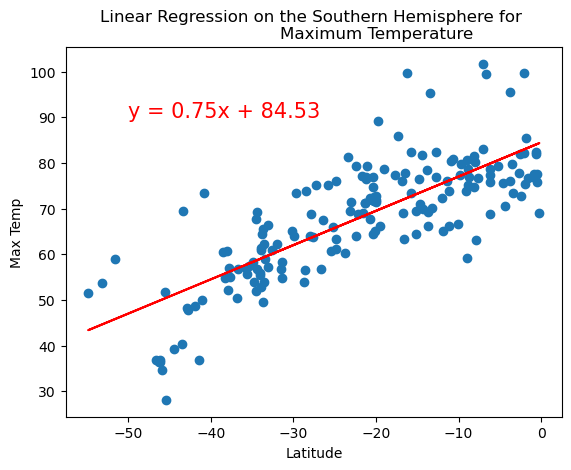

In [27]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for \n\
                        Maximum Temperature',
                       'Max Temp', (-50, 90))

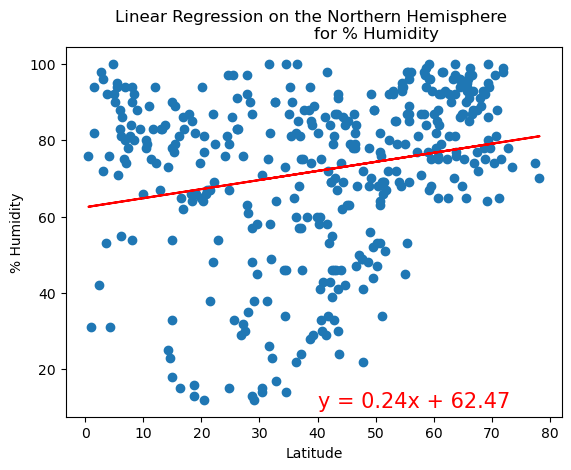

In [29]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for % Humidity',
                       '% Humidity', (40, 10))

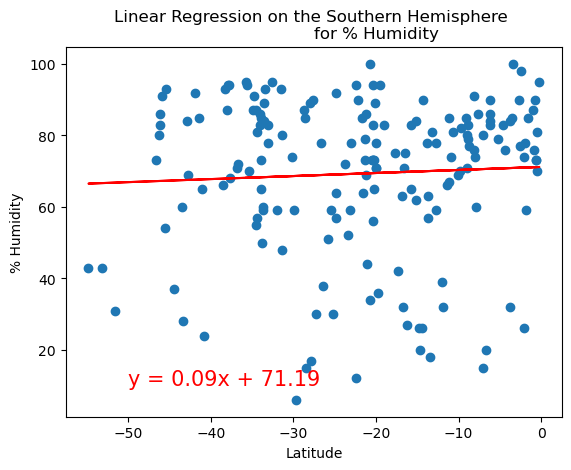

In [31]:
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Humidity',
                       '% Humidity', (-50, 10))

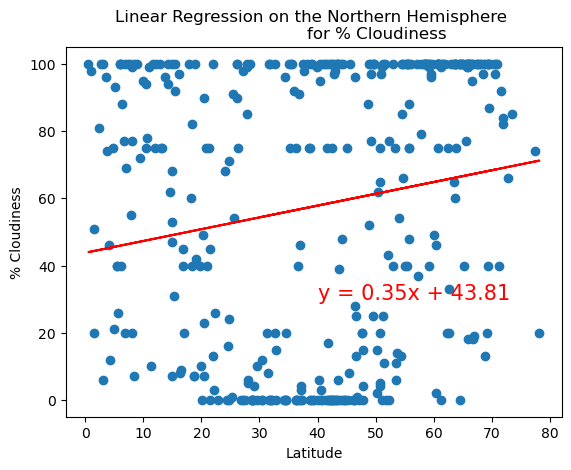

In [33]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for % Cloudiness',
                       '% Cloudiness', (40, 30))

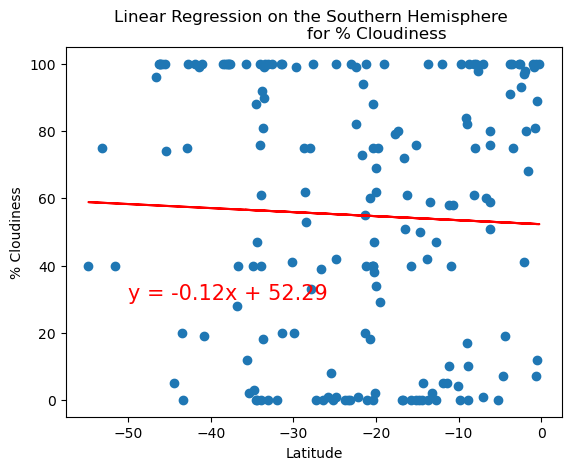

In [34]:
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Cloudiness',
                       '% Cloudiness', (-50, 30))

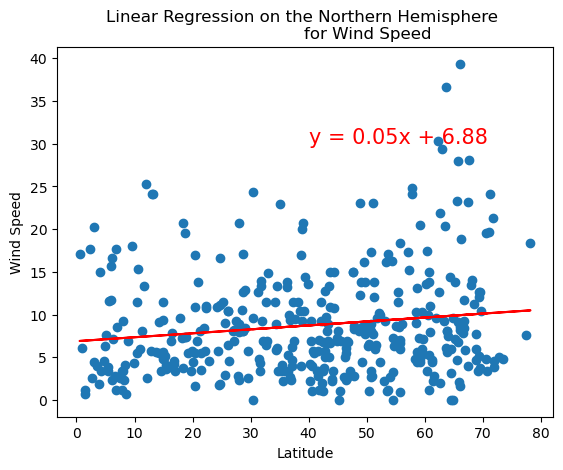

In [35]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Call function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for Wind Speed',
                       'Wind Speed', (40, 30))

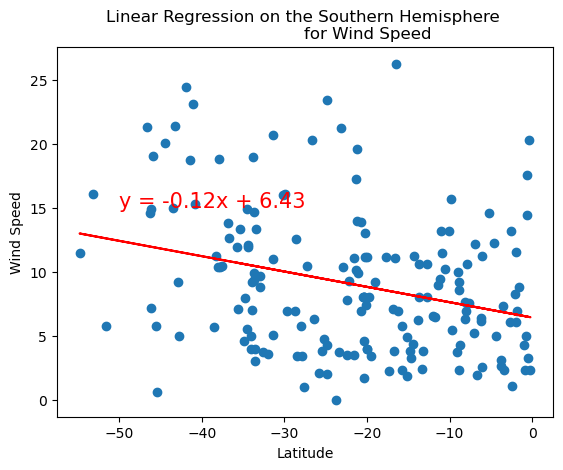

In [37]:
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Call function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for Wind Speed',
                       'Wind Speed', (-50, 15))